# Predicting Heart Disease in Patients Using Classification

### Introduction:

Heart disease, also known as cardiovascular disease, refers to conditions which affect the heart, the most common of these conditions being coronary artery disease. Heart disease can lead to heart attacks, heart failure, arrhythmias and heart valve diseases. Some risk factors include high blood pressure, high cholesterol, obesity, and a sedentary lifestyle.

The question we attempt to answer is, "Can we predict the severity of heart disease, if any, in a patient based on their age, pain type, cholesterol, max heart rate, exercise induced angina, and gender?".

To answer this, the chosen data set is the “Heart Disease” dataset. Each observation contains details about an individual. It contains 14 variables with different attributes relating to heart disease, including an assigned value of 1-4 regarding the presence of heart disease in the individual.


### Preliminary Exploratory Data Analysis:


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(readr) #loading R packages

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [2]:
urlfile= "https://raw.githubusercontent.com/cocom250/DSCI-100-Group-17/main/heart_disease_uci.csv"
heart_disease_data <- read_csv(url(urlfile))
head(heart_disease_data) #reading data

Rows: 920 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): sex, dataset, cp, restecg, slope, thal
dbl (8): id, age, trestbps, chol, thalch, oldpeak, ca, num
lgl (2): fbs, exang

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<lgl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>
1,63,Male,Cleveland,typical angina,145,233,TRUE,lv hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,0
2,67,Male,Cleveland,asymptomatic,160,286,FALSE,lv hypertrophy,108,TRUE,1.5,flat,3,normal,2
3,67,Male,Cleveland,asymptomatic,120,229,FALSE,lv hypertrophy,129,TRUE,2.6,flat,2,reversable defect,1
4,37,Male,Cleveland,non-anginal,130,250,FALSE,normal,187,FALSE,3.5,downsloping,0,normal,0
5,41,Female,Cleveland,atypical angina,130,204,FALSE,lv hypertrophy,172,FALSE,1.4,upsloping,0,normal,0
6,56,Male,Cleveland,atypical angina,120,236,FALSE,normal,178,FALSE,0.8,upsloping,0,normal,0


In [3]:
heart_disease_data <- rename(heart_disease_data, 
                             region = dataset,
                             pain_type = cp,
                             resting_bps = trestbps,
                             fasting_bs = fbs,
                             resting_ecg = restecg,
                             max_hr = thalch,
                             n_major_vessel = ca,
                             severity = num) 
glimpse(heart_disease_data) #renaming columns 

Rows: 920
Columns: 16
$ id             <dbl> 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, …
$ age            <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44,…
$ sex            <chr> "Male", "Male", "Male", "Male", "Female", "Male", "Fema…
$ region         <chr> "Cleveland", "Cleveland", "Cleveland", "Cleveland", "Cl…
$ pain_type      <chr> "typical angina", "asymptomatic", "asymptomatic", "non-…
$ resting_bps    <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, …
$ chol           <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, …
$ fasting_bs     <lgl> TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, …
$ resting_ecg    <chr> "lv hypertrophy", "lv hypertrophy", "lv hypertrophy", "…
$ max_hr         <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, …
$ exang          <lgl> FALSE, TRUE, TRUE, FALSE, FALSE, FALSE, FALSE, TRUE, FA…
$ oldpeak        <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, …
$ slope          <

In [4]:
heart_disease_data <- filter(heart_disease_data, region == "Switzerland") |>
    mutate(severity = as.factor(severity)) |>
    select(severity, age, pain_type, chol, max_hr, exang, resting_ecg, sex)

glimpse(heart_disease_data) #cleaning up data, filtering for Switzerland and selecting predictor columns

Rows: 123
Columns: 8
$ severity    <fct> 1, 1, 3, 1, 2, 1, 0, 1, 2, 1, 2, 2, 1, 2, 3, 4, 2, 0, 1, 1…
$ age         <dbl> 32, 34, 35, 36, 38, 38, 38, 38, 38, 38, 40, 41, 42, 42, 43…
$ pain_type   <chr> "typical angina", "asymptomatic", "asymptomatic", "asympto…
$ chol        <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ max_hr      <dbl> 127, 154, 130, 125, 166, 156, 179, 128, 150, 120, 144, 176…
$ exang       <lgl> FALSE, FALSE, TRUE, TRUE, FALSE, FALSE, FALSE, TRUE, FALSE…
$ resting_ecg <chr> "normal", NA, "normal", "normal", "normal", "normal", "nor…
$ sex         <chr> "Male", "Male", "Male", "Male", "Female", "Female", "Male"…


In [5]:
heart_disease_split <- initial_split(heart_disease_data, prop = 0.75, strata = severity)
heart_disease_train <- training(heart_disease_split)
heart_disease_test <- testing(heart_disease_split) #splitting into training and testing data set

In [6]:
severity_proportion <- heart_disease_train |>
    group_by(severity) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(heart_disease_train))
severity_proportion #counting for the number of observations and proprtions of each severity level

pain_type_count <- heart_disease_train|>
    group_by(severity, pain_type) |>
    summarize(n = n()) |>
    mutate(percent = 100*n/nrow(heart_disease_train))
pain_type_count #counting for the number of observations with each symptom in the data 

severity,n,percent
<fct>,<int>,<dbl>
0,5,5.494505
1,35,38.461538
2,25,27.472527
3,23,25.274725
4,3,3.296703


`summarise()` has grouped output by 'severity'. You can override using the
`.groups` argument.


severity,pain_type,n,percent
<fct>,<chr>,<int>,<dbl>
0,atypical angina,2,2.197802
0,non-anginal,3,3.296703
1,asymptomatic,27,29.670330
1,non-anginal,6,6.593407
1,typical angina,2,2.197802
2,asymptomatic,21,23.076923
2,non-anginal,2,2.197802
2,typical angina,2,2.197802
3,asymptomatic,19,20.879121


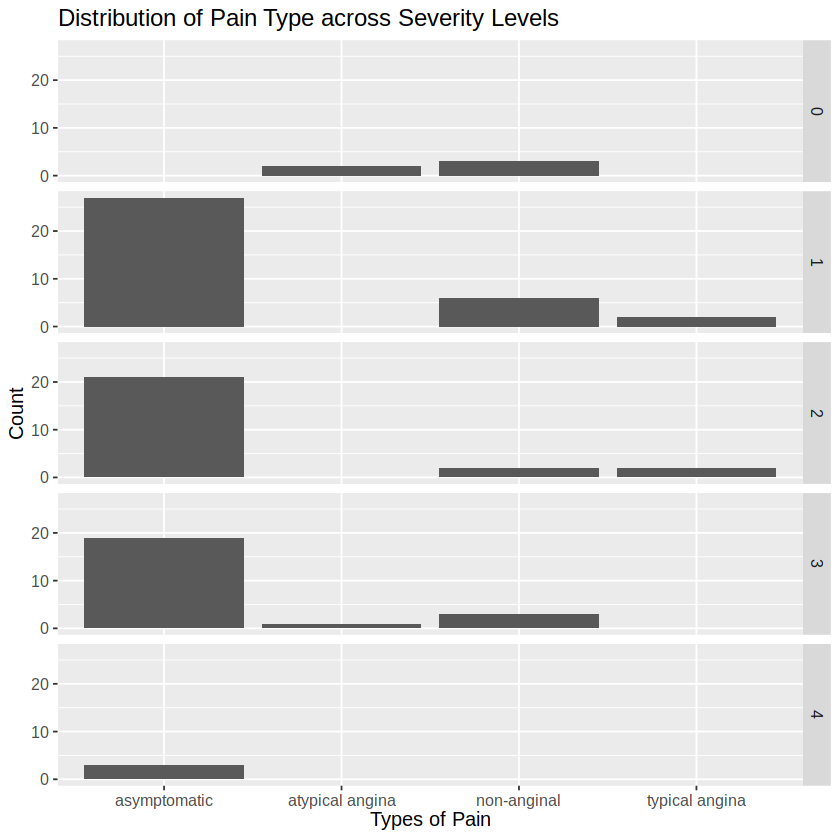

In [7]:
pain_type_distribution <- ggplot(pain_type_count, 
                                 aes(x= pain_type, y =n)) +
    geom_bar(stat ="identity") +
    labs(x = "Types of Pain", y = "Count")+
    theme(text = element_text(size =12)) +
    facet_grid(rows = vars(severity)) +
    ggtitle("Distribution of Pain Type across Severity Levels")
            
print(pain_type_distribution) #visualizing for the distribution of pain type across each severity level

### Expected outcomes and significance:

Through our project, we expect to find a model to predict whether patients from Switzerland have heart disease or not using classification.

Since we can predict whether patients have heart disease or not, for those who are classified to have heart disease but do not have medical check-ups yet, we can encourage them to check their heart before the disease becomes prominently serious.

First question would be which factors have the most influence on our prediction. For example, sex, age, pain type, etc, which factors are mostly related to the patients’ heart disease?
Second question would be after finding out the answer for the first question, how can we “weight” “each factor” “differently”, not equally therefore we can increase our prediction model in terms of precision and accuracy.
